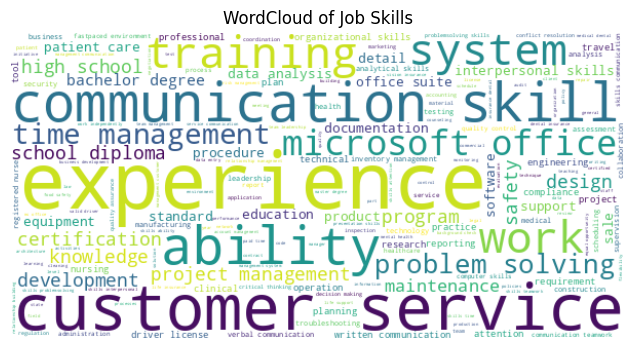

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/cleaned_job_skills.csv', on_bad_lines='skip', engine='python')
sample_text = ' '.join(df['job_skills'].dropna().sample(5000, random_state=42).str.lower())
sample_text = sample_text.replace(',', ' ')

wordcloud = WordCloud(width=600, height=300, background_color='white').generate(sample_text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Job Skills')
plt.show()

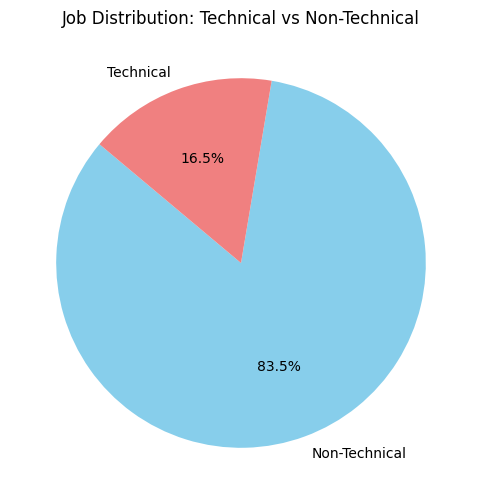

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

df = pd.read_csv("/content/cleaned_job_skills.csv" , on_bad_lines='skip', engine='python')

def categorize_job(title):
    title = title.lower()
    technical_keywords = ["engineer", "engineering", "analyst", "assembly", "electrical", "developer", "technician"]
    return "Technical" if any(word in title for word in technical_keywords) else "Non-Technical"

df['Category'] = df['job_link'].apply(categorize_job)

category_counts = df['Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Job Distribution: Technical vs Non-Technical")
plt.show()




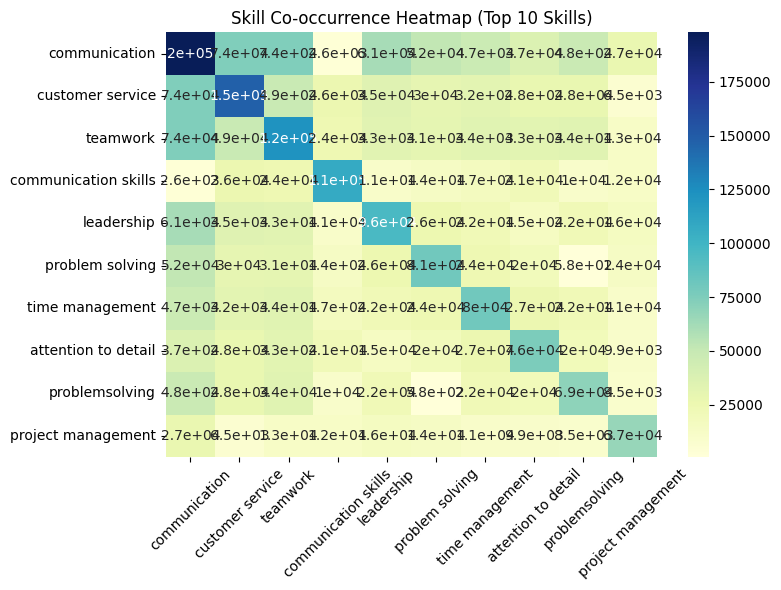

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv("/content/cleaned_job_skills.csv" , on_bad_lines='skip', engine='python')

df['job_skills'] = df['job_skills'].fillna("").str.lower()
df['skill_list'] = df['job_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])

flat_skills = [skill for skills in df['skill_list'] for skill in skills]

top_skills = [skill for skill, _ in Counter(flat_skills).most_common(10)]

skill_matrix = pd.DataFrame(0, index=df.index, columns=top_skills)

for i, skills in enumerate(df['skill_list']):
    for skill in skills:
        if skill in top_skills:
            skill_matrix.at[i, skill] = 1

co_occurrence = skill_matrix.T.dot(skill_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, cmap='YlGnBu')
plt.title("Skill Co-occurrence Heatmap (Top 10 Skills)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


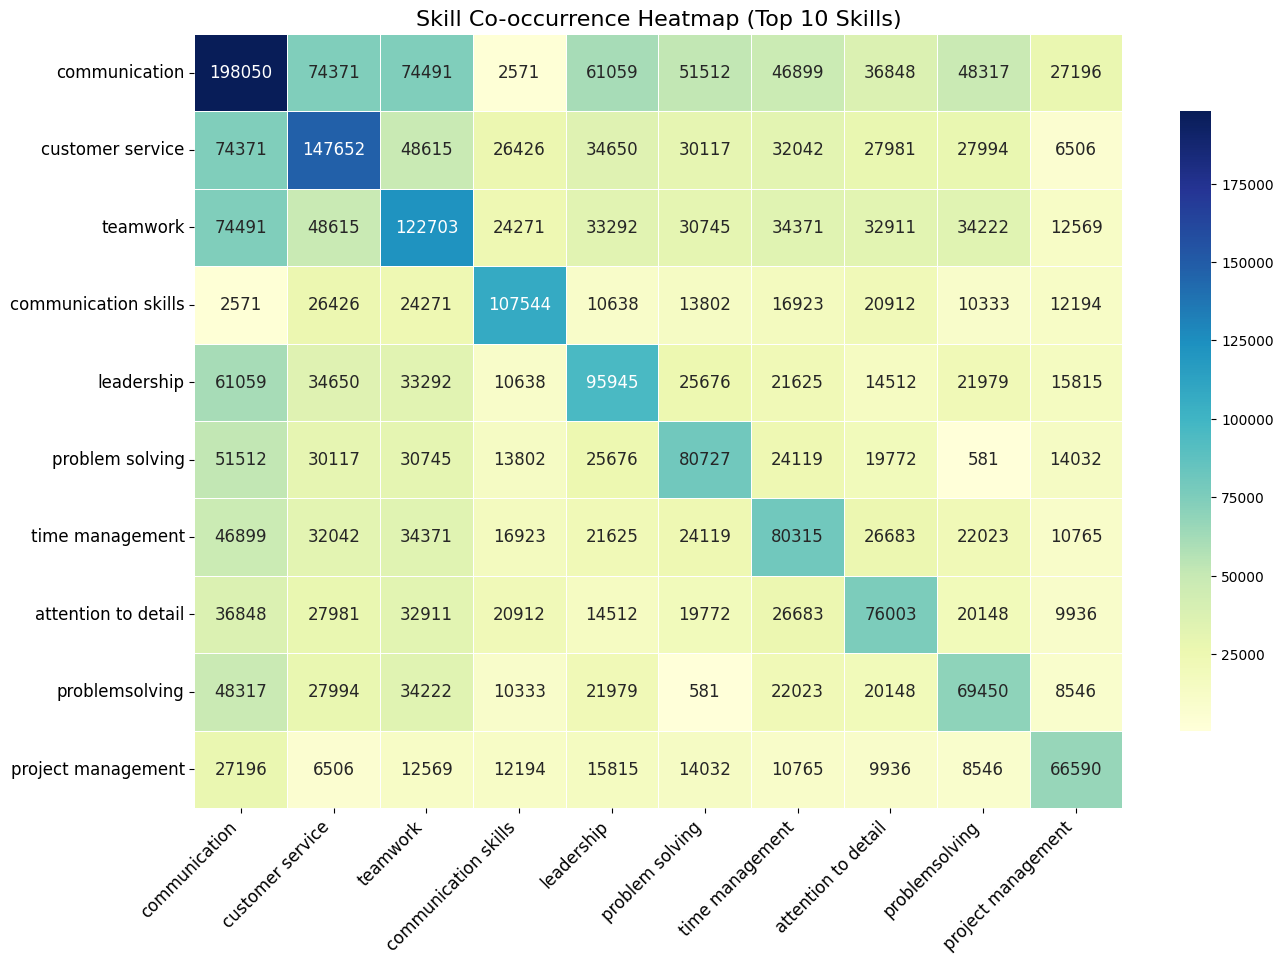

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv("/content/cleaned_job_skills.csv", on_bad_lines='skip', engine='python')


df['job_skills'] = df['job_skills'].fillna("").str.lower()
df['skill_list'] = df['job_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])

flat_skills = [skill for skills in df['skill_list'] for skill in skills]

top_skills = [skill for skill, _ in Counter(flat_skills).most_common(10)]

skill_matrix = pd.DataFrame(0, index=df.index, columns=top_skills)

for i, skills in enumerate(df['skill_list']):
    for skill in skills:
        if skill in top_skills:
            skill_matrix.at[i, skill] = 1

co_occurrence = skill_matrix.T.dot(skill_matrix)

plt.figure(figsize=(14, 10))

sns.heatmap(
    co_occurrence,
    annot=True,
    cmap='YlGnBu',
    fmt='d',
    annot_kws={"size": 12},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Skill Co-occurrence Heatmap (Top 10 Skills)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout(pad=2)
plt.show()